In [1]:
import cv2
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from glob import glob
from tqdm import tqdm
from easydict import EasyDict

True

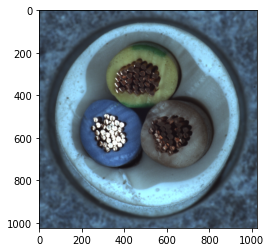

In [598]:
img = cv2.imread("../data/train/10522.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show
cv2.imwrite("./nkoll.png", img)

## Cutout

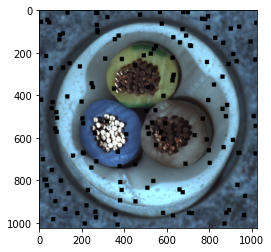

In [9]:
transforms = A.Compose([
    A.Cutout(p=1, num_holes=150, max_h_size=20, max_w_size=20)
])
aug_img = transforms(image=rgb_img)['image']
plt.imshow(aug_img)


## CoarseDropout

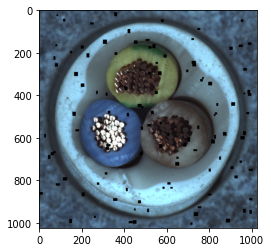

In [11]:
transforms = A.Compose([
    A.CoarseDropout(p=1, max_holes=150, min_holes=1, 
                    max_height=20, max_width=20,
                   min_height=8, min_width=8)
])
aug_img = transforms(image=rgb_img)['image']
plt.imshow(aug_img)


## Elastic Transfrom

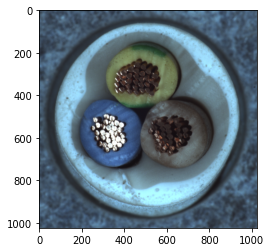

In [49]:
transforms = A.Compose([
    A.ElasticTransform(always_apply=False, p=1, 
                     alpha=0.20000000298023224, sigma=3.359999895095825, 
                     alpha_affine=2.009999990463257, 
                     interpolation=1, border_mode=1, 
                     value=(0, 0, 0), mask_value=None, approximate=False)
])
aug_img = transforms(image=rgb_img)['image']
plt.imshow(aug_img)


## GridDistortion

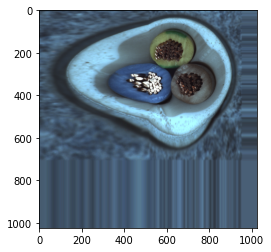

In [121]:
transforms = A.Compose([
    A.GridDistortion(always_apply=False, p=1, 
                     num_steps=2, 
                     # img 굴곡 조정
                     distort_limit=(-0.7, 0.7), 
                     interpolation=2, 
                     border_mode=1, 
                     value=(0, 0, 0), 
                     mask_value=None)
])
aug_img = transforms(image=rgb_img)['image']
plt.imshow(aug_img)



## Affine

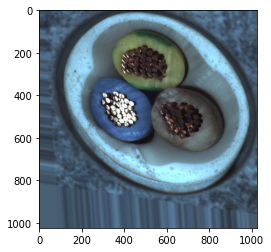

In [231]:
transforms = A.Compose([
    A.Affine(scale=None, # 이미지 크기 조정
             translate_percent=None, # 이미지 이동
             translate_px=None, # 픽셀단위로 이미지 이동
             rotate=None, # 회전 각도 조절
             shear=None, # 잡아당기는 효과
             interpolation=1, 
             mask_interpolation=0, 
             cval=16, cval_mask=16, 
             mode=1, # 회전 할 떄 남은 부분 색으로 채우기
             fit_output=False, always_apply=False, p=1)
])
aug_img = transforms(image=rgb_img)['image']
plt.imshow(aug_img)



## RandomGridShuffle

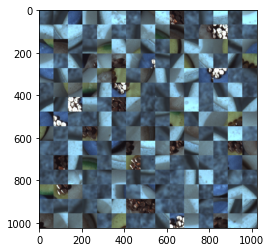

In [600]:
transforms = A.Compose([
    A.RandomGridShuffle(p=1, grid=(15, 15))
])
aug_img = transforms(image=rgb_img)['image']
plt.imshow(aug_img)



In [599]:
transforms = A.Compose([
    A.Mixup(p=1)    
])
aug_img = transforms(image=rgb_img)['image']
plt.imshow(aug_img)



AttributeError: module 'albumentations' has no attribute 'Mixup'

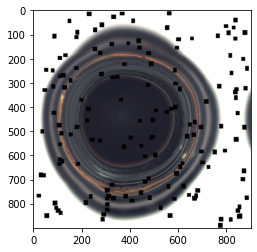

In [597]:
img = cv2.imread("../data/train/11716.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transforms = A.Compose([
    A.OneOf([
        A.Rotate(),
        A.HorizontalFlip(),
        A.VerticalFlip()
    ], p=1),
    
#     A.OneOf([
    A.Affine(mode=1, p=0.7),
    A.GridDistortion(p=0.7),
#     ], p=1),
    
    A.OneOf([
        A.Cutout(num_holes=150, max_h_size=20, max_w_size=20),
        A.CoarseDropout(max_holes=150, min_holes=150, 
                    max_height=20, max_width=20,
                   min_height=15, min_width=15)
    ], p=1)
])
aug_img = transforms(image=rgb_img)['image']
plt.imshow(aug_img)

